In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/natorjunior/debates-ideologicos/main/dataset.csv')

In [ ]:
df_positivo = df.query('Label == 1')

In [ ]:
text = ' '.join(df.query('Label == 1').Text.values)

In [ ]:
#text.split(' ')

In [ ]:
import nltk
from nltk.corpus import stopwords
# Baixar as stop words
nltk.download('stopwords')
text = ' '.join(df.query('Label == 0').Text.values)
# Lista de palavras (exemplo)
words = text.split(' ')

# Carregar as stop words em português
stop_words = set(stopwords.words('portuguese'))
# Filtrar as palavras, removendo as stop words
filtered_words = [word for word in words if word not in stop_words]

text =  ' '.join(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


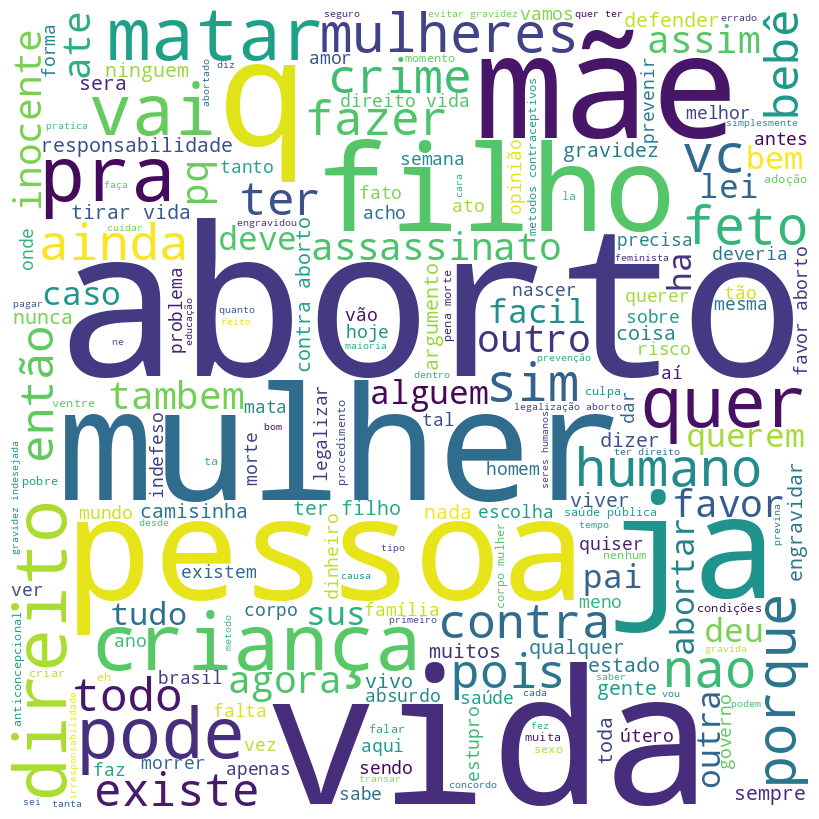

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerando a nuvem de palavras
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

# Exibindo a imagem gerada
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



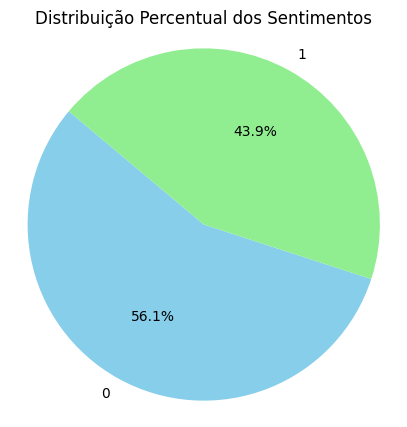

In [ ]:
# Agrupando e contando
label_counts = df['Label'].value_counts()
# Criando o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribuição Percentual dos Sentimentos')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Mostrando o gráfico
plt.show()



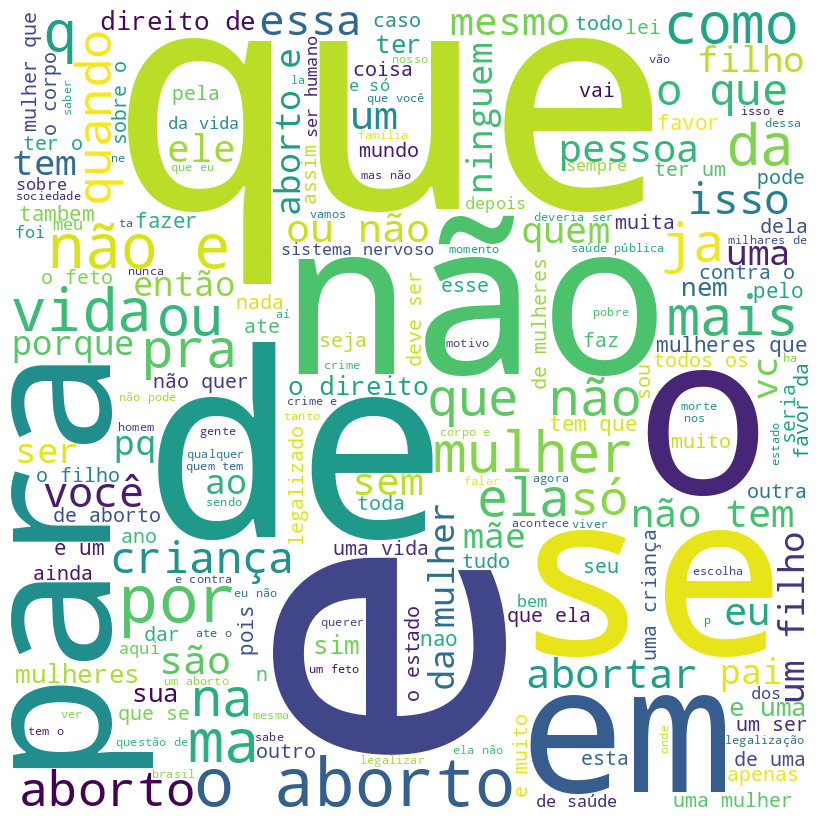

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# texto
text = ' '.join(df.query('Label == 1').Text.values)
# Gerando a nuvem de palavras
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

# Exibindo a imagem gerada
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



In [ ]:
import nltk
from nltk.corpus import stopwords
# Baixar as stop words
nltk.download('stopwords')
# Carregar as stop words em português
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


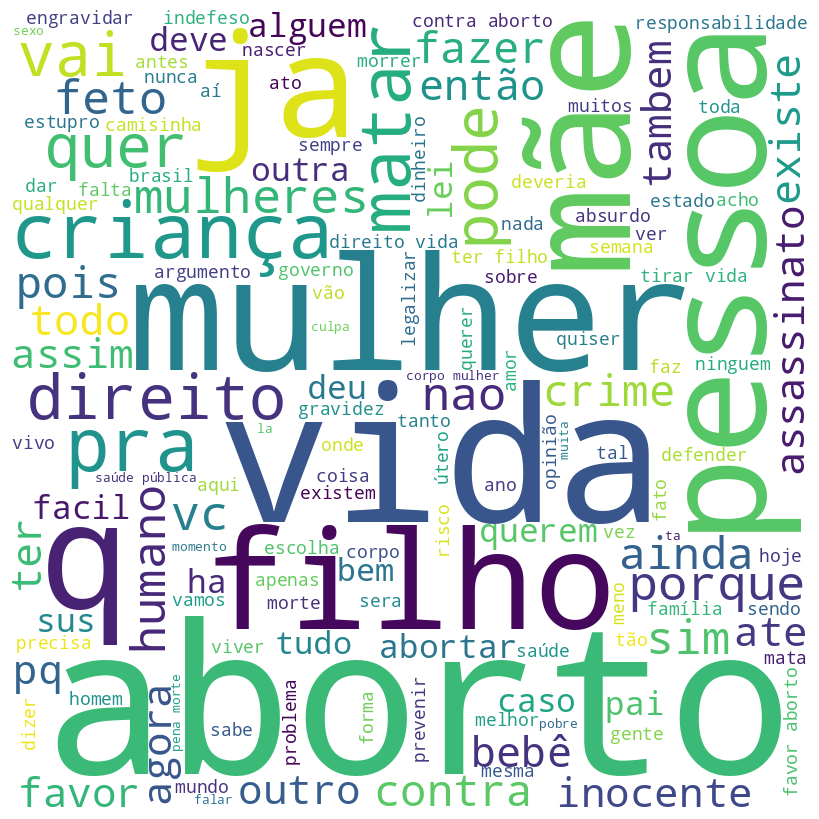

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words = df.query('Label == 0').Text.values

# Filtrar textos onde Label é 1 e remover stop words
text_filtered = ' '.join([word.lower() for text in words for word in text.split() if word.lower() not in stop_words])

# Gerando a nuvem de palavras
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_filtered)

# Exibindo a imagem gerada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
text_filtered[0]#.split()

'd'

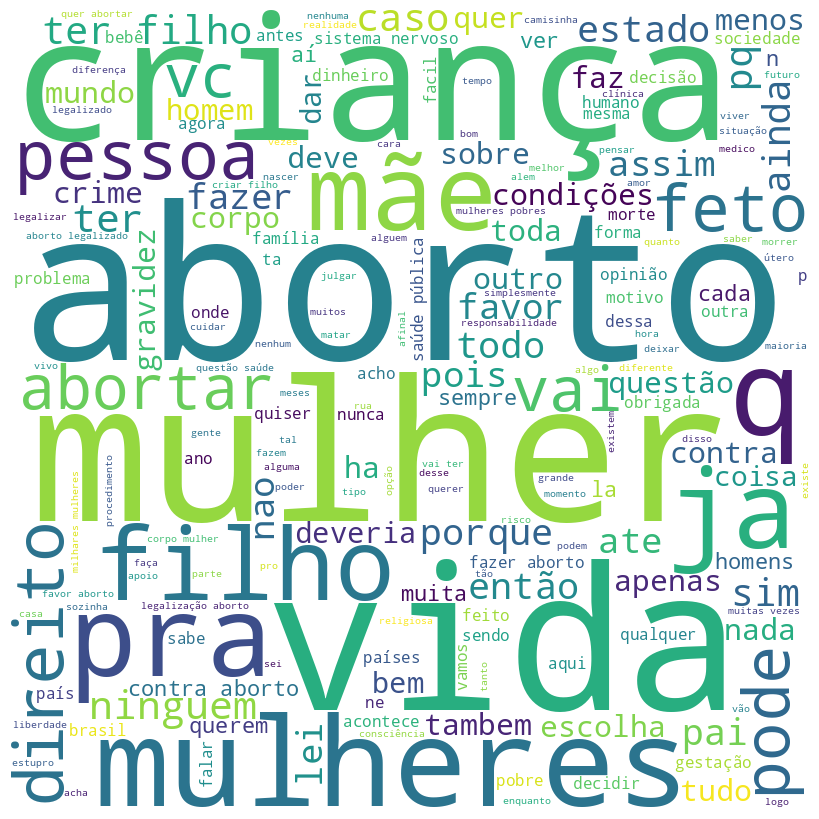

In [ ]:
# Importando as bibliotecas necessárias
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Obtendo textos do DataFrame onde o valor de 'Label' é 1
words = df.query('Label == 1').Text.values

# Filtrando os textos: removendo as stop words e convertendo para minúsculas
text_filtered = ' '.join([word.lower() for text in words for word in text.split() if word.lower() not in stop_words])

# Criando a nuvem de palavras com configurações específicas
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_filtered)

# Configurando a exibição da imagem gerada
plt.figure(figsize=(8, 8), facecolor=None)  # Definindo o tamanho e cor de fundo da figura
plt.imshow(wordcloud)  # Exibindo a nuvem de palavras
plt.axis("off")  # Desativando os eixos
plt.tight_layout(pad=0)  # Ajustando o layout

# Exibindo a figura com a nuvem de palavras
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baixar as stop words e o tokenizer
nltk.download('stopwords')
nltk.download('punkt')
# Carregar as stop words em português
stop_words = set(stopwords.words('portuguese'))
# Função de pré-processamento
def preprocessar(texto):
    # Converter o texto para minúsculas
    texto = texto.lower()

    # Tokenizar o texto
    palavras = word_tokenize(texto)

    # Remover as stop words
    palavras_filtradas = [palavra for palavra in palavras if palavra.lower() not in stop_words]

    # Juntar as palavras filtradas de volta em uma string
    texto_filtrado = ' '.join(palavras_filtradas)

    return texto_filtrado

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['texto_pre_processado'] = df['Text'].apply(preprocessar)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm,datasets
from joblib import dump

vectorizer = CountVectorizer()# criando uma instância do vetorizador BoW
bow_matrix = vectorizer.fit_transform(df['texto_pre_processado'])# criando a matriz BoW
x_data = bow_matrix.toarray()
y_data = df['Label'].values


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)


In [ ]:
# Treinar um modelo SVM
model = svm.SVC()
model.fit(x_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(x_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
cm = confusion_matrix(y_test, y_pred)
cm

Acurácia: 0.8135593220338984
Precisão: 0.8534031413612565
Recall: 0.6965811965811965
F1-Score: 0.7670588235294118


array([[269,  28],
       [ 71, 163]])

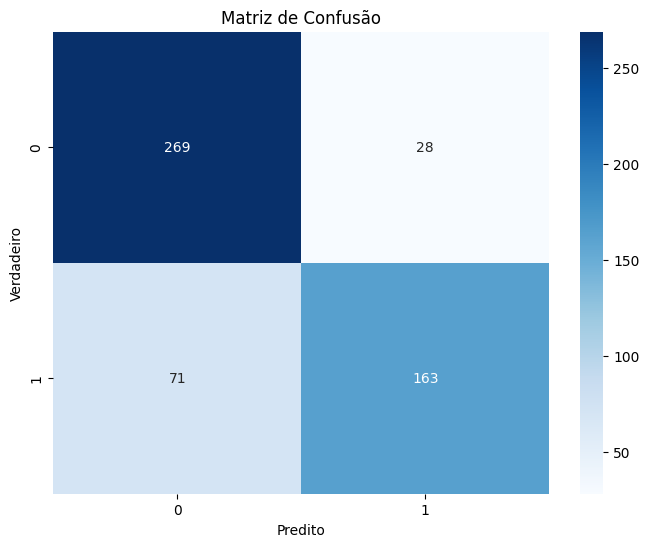

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a matriz de confusão

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()



In [ ]:
# Transformar o texto em um vetor
texto_vetorizado = vectorizer.transform(['Pessoas a contra o aborto deveriam morrer']).toarray()
# Fazer a previsão
predicao = model.predict(texto_vetorizado)

Acurácia: 0.8286252354048964
Precisão: 0.8042553191489362
Recall: 0.8076923076923077
F1-Score: 0.8059701492537312


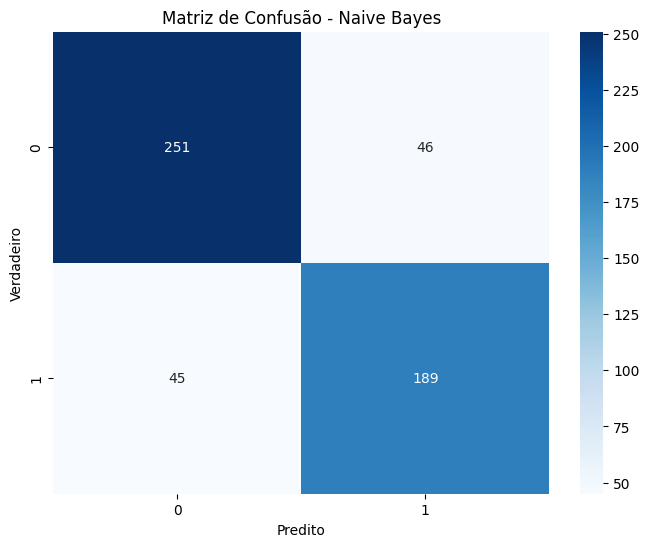

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Treinar um modelo Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(x_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred_nb = model_nb.predict(x_test)

# Calcular métricas
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='binary')
recall_nb = recall_score(y_test, y_pred_nb, average='binary')
f1_nb = f1_score(y_test, y_pred_nb, average='binary')

# Gerar a matriz de confusão
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Imprimir as métricas
print("Acurácia:", accuracy_nb)
print("Precisão:", precision_nb)
print("Recall:", recall_nb)
print("F1-Score:", f1_nb)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusão - Naive Bayes')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [ ]:
df

,Text,Label,texto_pre_processado
0,diego freitas e a jovem pobre q mora no morro ...,1,diego freitas jovem pobre q mora morro instruç...
1,moral e algo pessoal não tente enfiar seus val...,1,moral algo pessoal tente enfiar valores morais...
2,eu acho engraçado que se posicionar sobre o út...,1,acho engraçado posicionar sobre útero alheio m...
3,adriano barboza da mesma forma como vc demonst...,1,adriano barboza mesma forma vc demonstrou ótim...
4,a vida termina qnd acaba atividade cerebral en...,1,vida termina qnd acaba atividade cerebral enta...
...,...,...,...
1765,e assustador ver pessoas defendendo a eugenia ...,0,assustador ver pessoas defendendo eugenia atit...
1766,no dia em que a medicina conseguir descobrir q...,0,dia medicina conseguir descobrir certos humano...
1767,tenho minhas ideias sobre o aborto não sou rel...,0,ideias sobre aborto religioso perto acredito t...
1768,melhor comentario leia e difícil entender a ta...,0,melhor comentario leia difícil entender tara a...


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar o Tokenizer e o Modelo BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

# Função para extrair embeddings do BERT
def get_bert_embeddings(sentences):
    inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
    outputs = model_bert(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy()

# Seus dados: 'sentences' é uma lista de frases, 'labels' é uma lista de rótulos
# Exemplo:
# sentences = ["Eu gosto de correr", "O clima está frio"]
# labels = [1, 0]

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2)

# Extrair embeddings BERT
x_train_embeddings = get_bert_embeddings(x_train.tolist())
x_test_embeddings = get_bert_embeddings(x_test.tolist())

# Treinar um modelo Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(x_train_embeddings, y_train)

# Fazer previsões com o conjunto de teste
y_pred_nb = model_nb.predict(x_test_embeddings)

# Calcular métricas
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='binary')
recall_nb = recall_score(y_test, y_pred_nb, average='binary')
accuracy_nb,precision_nb,recall_nb


NameError: name 'accuracy_nb' is not defined